### DATA 620 - Web Analytics
### Week 4 Part 2

### Team 3
+ Brian Liles
+ Rajwant Mishra
+ Md. Jalal Uddin
+ Sarah Wigodsky

#### Vidoe: [Youtube](https://www.youtube.com/embed/1txS5y0agVM)
<iframe width="560" height="315" src="https://www.youtube.com/embed/1txS5y0agVM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Works of Edgar Allan Poe - Volume 1
Project Gutenberg
https://www.gutenberg.org/files/2147/2147-0.txt

In [232]:
#import libraries
from urllib.request import urlopen
import nltk
import re
import pprint
import seaborn as sn
from nltk.corpus import stopwords as sw
import matplotlib.pyplot as plt
import pandas as pd
import string
from wordcloud import WordCloud
pd.set_option('display.max_colwidth',100)

In [233]:
#download works for Edgar Allan Poe volume 1 from Project Gutenberg
#text defaults to bytes- it needs to be set to utf-8
url = "https://www.gutenberg.org/files/2147/2147-0.txt"
raw=''
with urlopen(url) as response:
     for line in response:
         line = line.decode('utf-8')  # Decoding the binary data to text.
         raw = raw + line

In [234]:
print(type(raw))
#prints number of characters
print(len(raw))
# Print the beginning of raw data
raw[0:400]

<class 'str'>
550334


'\ufeffProject Gutenberg’s The Works of Edgar Allan Poe, by Edgar Allan Poe\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: The Works of Edgar Allan Poe\r\n       Volume 1 (of 5) of the Rav'

There are 550,334 characters.  This includes spaces, characters to indicate new lines and punctuation.

In [235]:
#Alternate ways to find start and end of Book text 
for m in re.finditer(r"THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL|END", raw):
    print ('%02d-%02d: %s' % (m.start(), m.end(), m.group(0)))

raw.find("THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL")
raw.rfind("END")

51526-51572: THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL
531257-531260: END
548509-548512: END


548509

In [236]:
#There is a long introduction about Edgar Allan Poe before the story begins.  
#The string will be sliced so that it only includes Poe's writing.  This was determined by inspecting the text.
raw.find("THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL")
raw.rfind("END")
raw = raw[51526:531158]

In [237]:
parsedData = raw.replace('\r\n', '\n').split('\n')
parsedData[0:5]
fullCorpus = pd.DataFrame({
      'book_data': parsedData[:]
})

In [238]:
fullCorpus = fullCorpus[fullCorpus['book_data']!=""]

In [239]:
print(len(fullCorpus.book_data))
# How many Rows are there?

print("Total Book has {} rows".format(len(fullCorpus)))

7107
Total Book has 7107 rows


Pre-processing text data
Cleaning (or pre-processing) the data typically consists of a number of steps:

+ Remove punctuation
+ Tokenization
+ Remove stopwords

In [240]:
fullCorpus.head()

,book_data
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1)
2,"BY late accounts from Rotterdam, that city seems to be in a high state"
3,"of philosophical excitement. Indeed, phenomena have there occurred of"
4,a nature so completely unexpected--so entirely novel--so utterly at
5,variance with preconceived opinions--as to leave no doubt on my mind


### Remove punctuation

In [241]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [242]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

fullCorpus['book_data_clean'] = fullCorpus['book_data'].apply(lambda x: remove_punct(x))

fullCorpus.head()

,book_data,book_data_clean
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1),THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL 1
2,"BY late accounts from Rotterdam, that city seems to be in a high state",BY late accounts from Rotterdam that city seems to be in a high state
3,"of philosophical excitement. Indeed, phenomena have there occurred of",of philosophical excitement Indeed phenomena have there occurred of
4,a nature so completely unexpected--so entirely novel--so utterly at,a nature so completely unexpectedso entirely novelso utterly at
5,variance with preconceived opinions--as to leave no doubt on my mind,variance with preconceived opinionsas to leave no doubt on my mind


### Tokenization

In [243]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

fullCorpus['book_data_tokenized'] = fullCorpus['book_data'].apply(lambda x: tokenize(x))

fullCorpus.head()

,book_data,book_data_clean,book_data_tokenized
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1),THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL 1,"[THE, UNPARALLELED, ADVENTURES, OF, ONE, HANS, PFAALL, 1, ]"
2,"BY late accounts from Rotterdam, that city seems to be in a high state",BY late accounts from Rotterdam that city seems to be in a high state,"[BY, late, accounts, from, Rotterdam, that, city, seems, to, be, in, a, high, state]"
3,"of philosophical excitement. Indeed, phenomena have there occurred of",of philosophical excitement Indeed phenomena have there occurred of,"[of, philosophical, excitement, Indeed, phenomena, have, there, occurred, of]"
4,a nature so completely unexpected--so entirely novel--so utterly at,a nature so completely unexpectedso entirely novelso utterly at,"[a, nature, so, completely, unexpected, so, entirely, novel, so, utterly, at]"
5,variance with preconceived opinions--as to leave no doubt on my mind,variance with preconceived opinionsas to leave no doubt on my mind,"[variance, with, preconceived, opinions, as, to, leave, no, doubt, on, my, mind]"


In [244]:
fullCorpus['book_data_tokenized'] = fullCorpus['book_data_clean'].apply(lambda x: tokenize(x.lower()))

fullCorpus.head()

,book_data,book_data_clean,book_data_tokenized
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1),THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL 1,"[the, unparalleled, adventures, of, one, hans, pfaall, 1]"
2,"BY late accounts from Rotterdam, that city seems to be in a high state",BY late accounts from Rotterdam that city seems to be in a high state,"[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]"
3,"of philosophical excitement. Indeed, phenomena have there occurred of",of philosophical excitement Indeed phenomena have there occurred of,"[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]"
4,a nature so completely unexpected--so entirely novel--so utterly at,a nature so completely unexpectedso entirely novelso utterly at,"[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]"
5,variance with preconceived opinions--as to leave no doubt on my mind,variance with preconceived opinionsas to leave no doubt on my mind,"[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]"


In [245]:
fullCorpus['book_data_tokenized_nlkt'] = fullCorpus['book_data_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))

fullCorpus.head(10)

,book_data,book_data_clean,book_data_tokenized,book_data_tokenized_nlkt
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1),THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL 1,"[the, unparalleled, adventures, of, one, hans, pfaall, 1]","[the, unparalleled, adventures, of, one, hans, pfaall, 1]"
2,"BY late accounts from Rotterdam, that city seems to be in a high state",BY late accounts from Rotterdam that city seems to be in a high state,"[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]","[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]"
3,"of philosophical excitement. Indeed, phenomena have there occurred of",of philosophical excitement Indeed phenomena have there occurred of,"[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]","[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]"
4,a nature so completely unexpected--so entirely novel--so utterly at,a nature so completely unexpectedso entirely novelso utterly at,"[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]","[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]"
5,variance with preconceived opinions--as to leave no doubt on my mind,variance with preconceived opinionsas to leave no doubt on my mind,"[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]","[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]"
6,"that long ere this all Europe is in an uproar, all physics in a ferment,",that long ere this all Europe is in an uproar all physics in a ferment,"[that, long, ere, this, all, europe, is, in, an, uproar, all, physics, in, a, ferment]","[that, long, ere, this, all, europe, is, in, an, uproar, all, physics, in, a, ferment]"
7,all reason and astronomy together by the ears.,all reason and astronomy together by the ears,"[all, reason, and, astronomy, together, by, the, ears]","[all, reason, and, astronomy, together, by, the, ears]"
9,It appears that on the---- day of---- (I am not positive about the,It appears that on the day of I am not positive about the,"[it, appears, that, on, the, day, of, i, am, not, positive, about, the]","[it, appears, that, on, the, day, of, i, am, not, positive, about, the]"
10,"date), a vast crowd of people, for purposes not specifically",date a vast crowd of people for purposes not specifically,"[date, a, vast, crowd, of, people, for, purposes, not, specifically]","[date, a, vast, crowd, of, people, for, purposes, not, specifically]"
11,"mentioned, were assembled in the great square of the Exchange in the",mentioned were assembled in the great square of the Exchange in the,"[mentioned, were, assembled, in, the, great, square, of, the, exchange, in, the]","[mentioned, were, assembled, in, the, great, square, of, the, exchange, in, the]"


### Remove stopwords

In [246]:
stopword = nltk.corpus.stopwords.words('english')
stopword.append('upon')
stopword.append('would')
stopword.append('us')
stopword.append('would')
stopword.append('could')
stopword.append('much')
stopword.append('great')
stopword[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [247]:
# Checking if Tokenized word is in Stopword 
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

fullCorpus['book_data_nostop'] = fullCorpus['book_data_tokenized'].apply(lambda x: remove_stopwords(x))

fullCorpus.head()

,book_data,book_data_clean,book_data_tokenized,book_data_tokenized_nlkt,book_data_nostop
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1),THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL 1,"[the, unparalleled, adventures, of, one, hans, pfaall, 1]","[the, unparalleled, adventures, of, one, hans, pfaall, 1]","[unparalleled, adventures, one, hans, pfaall, 1]"
2,"BY late accounts from Rotterdam, that city seems to be in a high state",BY late accounts from Rotterdam that city seems to be in a high state,"[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]","[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]","[late, accounts, rotterdam, city, seems, high, state]"
3,"of philosophical excitement. Indeed, phenomena have there occurred of",of philosophical excitement Indeed phenomena have there occurred of,"[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]","[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]","[philosophical, excitement, indeed, phenomena, occurred]"
4,a nature so completely unexpected--so entirely novel--so utterly at,a nature so completely unexpectedso entirely novelso utterly at,"[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]","[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]","[nature, completely, unexpectedso, entirely, novelso, utterly]"
5,variance with preconceived opinions--as to leave no doubt on my mind,variance with preconceived opinionsas to leave no doubt on my mind,"[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]","[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]","[variance, preconceived, opinionsas, leave, doubt, mind]"


### Stem text

In [248]:
# Pass the final set nonstopword list to get stem text
# Stem text are like running = run run = run  
# (issue ) runner = run (which is not right but stem does it)
# it helps in reducing the corpus size given we are able to stem our words correctly.

In [249]:
# ps is porterstemmer 
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

fullCorpus['book_data_stemmed'] = fullCorpus['book_data_nostop'].apply(lambda x: stemming(x))

fullCorpus.head()

,book_data,book_data_clean,book_data_tokenized,book_data_tokenized_nlkt,book_data_nostop,book_data_stemmed
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1),THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL 1,"[the, unparalleled, adventures, of, one, hans, pfaall, 1]","[the, unparalleled, adventures, of, one, hans, pfaall, 1]","[unparalleled, adventures, one, hans, pfaall, 1]","[unparallel, adventur, one, han, pfaall, 1]"
2,"BY late accounts from Rotterdam, that city seems to be in a high state",BY late accounts from Rotterdam that city seems to be in a high state,"[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]","[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]","[late, accounts, rotterdam, city, seems, high, state]","[late, account, rotterdam, citi, seem, high, state]"
3,"of philosophical excitement. Indeed, phenomena have there occurred of",of philosophical excitement Indeed phenomena have there occurred of,"[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]","[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]","[philosophical, excitement, indeed, phenomena, occurred]","[philosoph, excit, inde, phenomena, occur]"
4,a nature so completely unexpected--so entirely novel--so utterly at,a nature so completely unexpectedso entirely novelso utterly at,"[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]","[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]","[nature, completely, unexpectedso, entirely, novelso, utterly]","[natur, complet, unexpectedso, entir, novelso, utterli]"
5,variance with preconceived opinions--as to leave no doubt on my mind,variance with preconceived opinionsas to leave no doubt on my mind,"[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]","[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]","[variance, preconceived, opinionsas, leave, doubt, mind]","[varianc, preconceiv, opinionsa, leav, doubt, mind]"


In [250]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


### Lemmatizing 
Lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word. So again, type, typed, and typing would all be simplified down to type, because that's the root of the word. Each variation carries the same meaning just with slightly different tense. 

##### Is Lemmatizing like stemming ? 
> The objective of both methods is to reduce the corpus size but they are doing it in just slightly different ways. In pratice, Lemmatizing is more accurate but is very intense and heavy computation  whereas Stemming is light and fast. 

The goal of both is to condense derived words down into their base form, to reduce the corpus of words that the model is exposed to, and to explicitly correlate words with similar meanings. 

In [251]:
wn = nltk.WordNetLemmatizer()

In [252]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))
print(ps.stem('mangoes'))
print(ps.stem('meaning'))
print(ps.stem('children'))
print(ps.stem('child'))

mean
mean
mango
mean
children
child


In [253]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning' ))
print(wn.lemmatize('mangoes'))
print(wn.lemmatize('mango'))
print(wn.lemmatize('children'))
print(wn.lemmatize('child'))
print(wn.lemmatize('seems'))

meanness
meaning
mango
mango
child
child
seems


In [254]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

fullCorpus['book_data_lemmatized'] = fullCorpus['book_data_nostop'].apply(lambda x: lemmatizing(x))

fullCorpus.head()

,book_data,book_data_clean,book_data_tokenized,book_data_tokenized_nlkt,book_data_nostop,book_data_stemmed,book_data_lemmatized
0,THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL (*1),THE UNPARALLELED ADVENTURES OF ONE HANS PFAALL 1,"[the, unparalleled, adventures, of, one, hans, pfaall, 1]","[the, unparalleled, adventures, of, one, hans, pfaall, 1]","[unparalleled, adventures, one, hans, pfaall, 1]","[unparallel, adventur, one, han, pfaall, 1]","[unparalleled, adventure, one, han, pfaall, 1]"
2,"BY late accounts from Rotterdam, that city seems to be in a high state",BY late accounts from Rotterdam that city seems to be in a high state,"[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]","[by, late, accounts, from, rotterdam, that, city, seems, to, be, in, a, high, state]","[late, accounts, rotterdam, city, seems, high, state]","[late, account, rotterdam, citi, seem, high, state]","[late, account, rotterdam, city, seems, high, state]"
3,"of philosophical excitement. Indeed, phenomena have there occurred of",of philosophical excitement Indeed phenomena have there occurred of,"[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]","[of, philosophical, excitement, indeed, phenomena, have, there, occurred, of]","[philosophical, excitement, indeed, phenomena, occurred]","[philosoph, excit, inde, phenomena, occur]","[philosophical, excitement, indeed, phenomenon, occurred]"
4,a nature so completely unexpected--so entirely novel--so utterly at,a nature so completely unexpectedso entirely novelso utterly at,"[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]","[a, nature, so, completely, unexpectedso, entirely, novelso, utterly, at]","[nature, completely, unexpectedso, entirely, novelso, utterly]","[natur, complet, unexpectedso, entir, novelso, utterli]","[nature, completely, unexpectedso, entirely, novelso, utterly]"
5,variance with preconceived opinions--as to leave no doubt on my mind,variance with preconceived opinionsas to leave no doubt on my mind,"[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]","[variance, with, preconceived, opinionsas, to, leave, no, doubt, on, my, mind]","[variance, preconceived, opinionsas, leave, doubt, mind]","[varianc, preconceiv, opinionsa, leav, doubt, mind]","[variance, preconceived, opinionsas, leave, doubt, mind]"


In [255]:
# All Function at one place 
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    nonPunct = re.compile('.*[A-Za-z].*')
 #   test = [w for w in text if nonPunct.match(w)]
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    text = [word for word in text if nonPunct.match(word)]
    return text

In [256]:
from sklearn.feature_extraction.text import CountVectorizer

#count_vect contains all of the values of the text after lower case, removing punctation, and stemming, removing stop words
count_vect = CountVectorizer(analyzer=clean_text)
#X_count contains the frequency matrix of each word
X_counts = count_vect.fit_transform(fullCorpus['book_data'])

print(X_counts.shape)  # How many rows are present and How many columns are present , i.e. How many unique word we have 
print(count_vect.get_feature_names()[1:10]) # All the Unique words 

(7107, 6532)
['11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th']


##### 2. How many total unique words are in the corpus?  

In [257]:
uniq_words = set(count_vect.get_feature_names())
print('After removing stop words and puncutation, there are ' + str(len(uniq_words)) + ' unique words in the corpus.')

After removing stop words and puncutation, there are 6532 unique words in the corpus.


In [258]:
# Building the Document Terms Matrix with Column as Unique word and row number is the row in book. 
X_count_df= pd.DataFrame(X_counts.toarray())

In [259]:
t= count_vect.fit_transform(fullCorpus['book_data']).toarray().ravel() 

In [260]:
#t1 = t / float(t.max())

In [261]:
#print(t[1:20])
#print(t1[1:20])

In [262]:
#columns are numbers that represent unique words
X_count_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6522,6523,6524,6525,6526,6527,6528,6529,6530,6531
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
# identifying column names
print(count_vect.get_feature_names()[100:200])
len(count_vect.get_feature_names())

['adjust', 'admir', 'admiss', 'admit', 'admitt', 'adolph', 'adopt', 'ador', 'adrift', 'aduanturi', 'advanc', 'advantag', 'advent', 'adventiti', 'adventur', 'advert', 'advertis', 'advertisementabout', 'advertnot', 'advic', 'advis', 'advou', 'aerial', 'aeronaut', 'aerost', 'afar', 'affair', 'affairat', 'affairbut', 'affect', 'affectedli', 'affection', 'affianc', 'affidavit', 'affin', 'affix', 'afford', 'affright', 'afloat', 'afraid', 'africa', 'african', 'aft', 'afternoon', 'afterward', 'age', 'agei', 'agenc', 'agent', 'aghast', 'agil', 'agit', 'ago', 'agog', 'agoni', 'agonywer', 'agre', 'agreeabl', 'agreement', 'agu', 'ah', 'ahi', 'ai', 'aid', 'aidesdecamp', 'ail', 'aim', 'ainsworth', 'aint', 'ainth', 'air', 'airrightli', 'airtight', 'airwa', 'ajar', 'akimbo', 'ala', 'alarm', 'alarmingli', 'albatrossat', 'alberto', 'ale', 'alecak', 'alexand', 'alexandr', 'alfonzo', 'alger', 'alien', 'alight', 'aliment', 'aliv', 'alla', 'allan', 'alland', 'allay', 'allbi', 'alley', 'allh', 'allif', 'alln

6532

In [264]:
# Add columnname to Features / Terms 
X_count_df.columns = count_vect.get_feature_names()
X_count_df.head(4)
#row represents line in book
#matrix counts number of occurances of word in that row

,10th,11th,12th,13th,14th,15th,16th,17th,18th,19th,...,zealou,zenith,zodiac,zone,zufal,zusammen,ærial,æronaut,ærostat,émeut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
# print(count_vect.get_feature_names()[1:5])
# print(X_counts.toarray()[1:5])
# Get the Term frq in Dataframe 
term = count_vect.get_feature_names()
count = X_counts.toarray().sum(axis=0)
book_data_tfdf = pd.DataFrame({'Terms': term,'Count':count })
book_data_tfdf = book_data_tfdf[book_data_tfdf.Terms!=""]
book_data_tfdf.head()

,Terms,Count
0,10th,1
1,11th,1
2,12th,1
3,13th,1
4,14th,1


In [266]:
# normalize count for each term by the maximum count 
#book_data_tfdf['Norm_Count'] = book_data_tfdf['Count']/book_data_tfdf['Count']/book_data_tfdf['Count'].max()

# To calculate the Relative Frequency - frequency of word divided by total word count
total_count = book_data_tfdf['Count'].sum()
book_data_tfdf['Rel_Freq'] = book_data_tfdf['Count']/ total_count

In [267]:
book_data_tfdf.sort_values(by=['Count'],ascending=False,inplace=True)
book_data_tfdf.head(10)

,Terms,Count,Rel_Freq
3987,one,264,0.006975
5822,time,159,0.004201
2306,found,155,0.004095
4986,say,124,0.003276
1954,even,115,0.003038
299,appear,114,0.003012
637,bodi,112,0.002959
2187,first,112,0.002959
1348,day,110,0.002906
5989,two,110,0.002906


In [268]:
# d = {Value: Count/total_count for Value in book_data_tfdf.Terms if (Value!='') and (bool(re.search('[A-Za-z]+', Value))==True) for Count in book_data_tfdf.Rel_Freq}
d = {Value:Count for Value in book_data_tfdf.Terms for Count in book_data_tfdf.Rel_Freq }
#building a dictionary where words are the key and the value is the related frequency

In [269]:
#type(d)
#sorted(d.values())

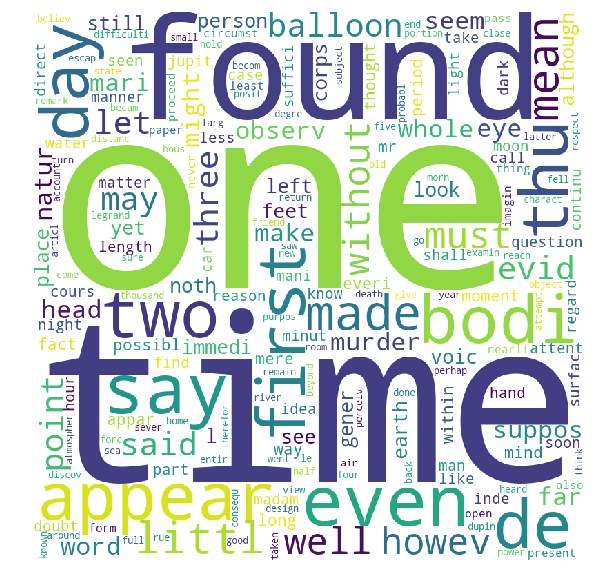

In [270]:
# pd.DataFrame({'Terms': term,'Count':count })

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopword, 
                min_font_size = 10).generate_from_frequencies(d)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

The wordcloud above displays more frequency words in the corpus as being a larger size.  The words 'one,' 'time,' 'found,' and 'say' are very frequent.

In [271]:
most_words = book_data_tfdf.head(200)
#most_words = most_words.groupby('Count')
most_words.head(10)

,Terms,Count,Rel_Freq
3987,one,264,0.006975
5822,time,159,0.004201
2306,found,155,0.004095
4986,say,124,0.003276
1954,even,115,0.003038
299,appear,114,0.003012
637,bodi,112,0.002959
2187,first,112,0.002959
1348,day,110,0.002906
5989,two,110,0.002906


##### 4. Identify the 200 highest frequency words in this corpus. 
##### 5. Create a graph that shows the relative frequency of these 200 words. 

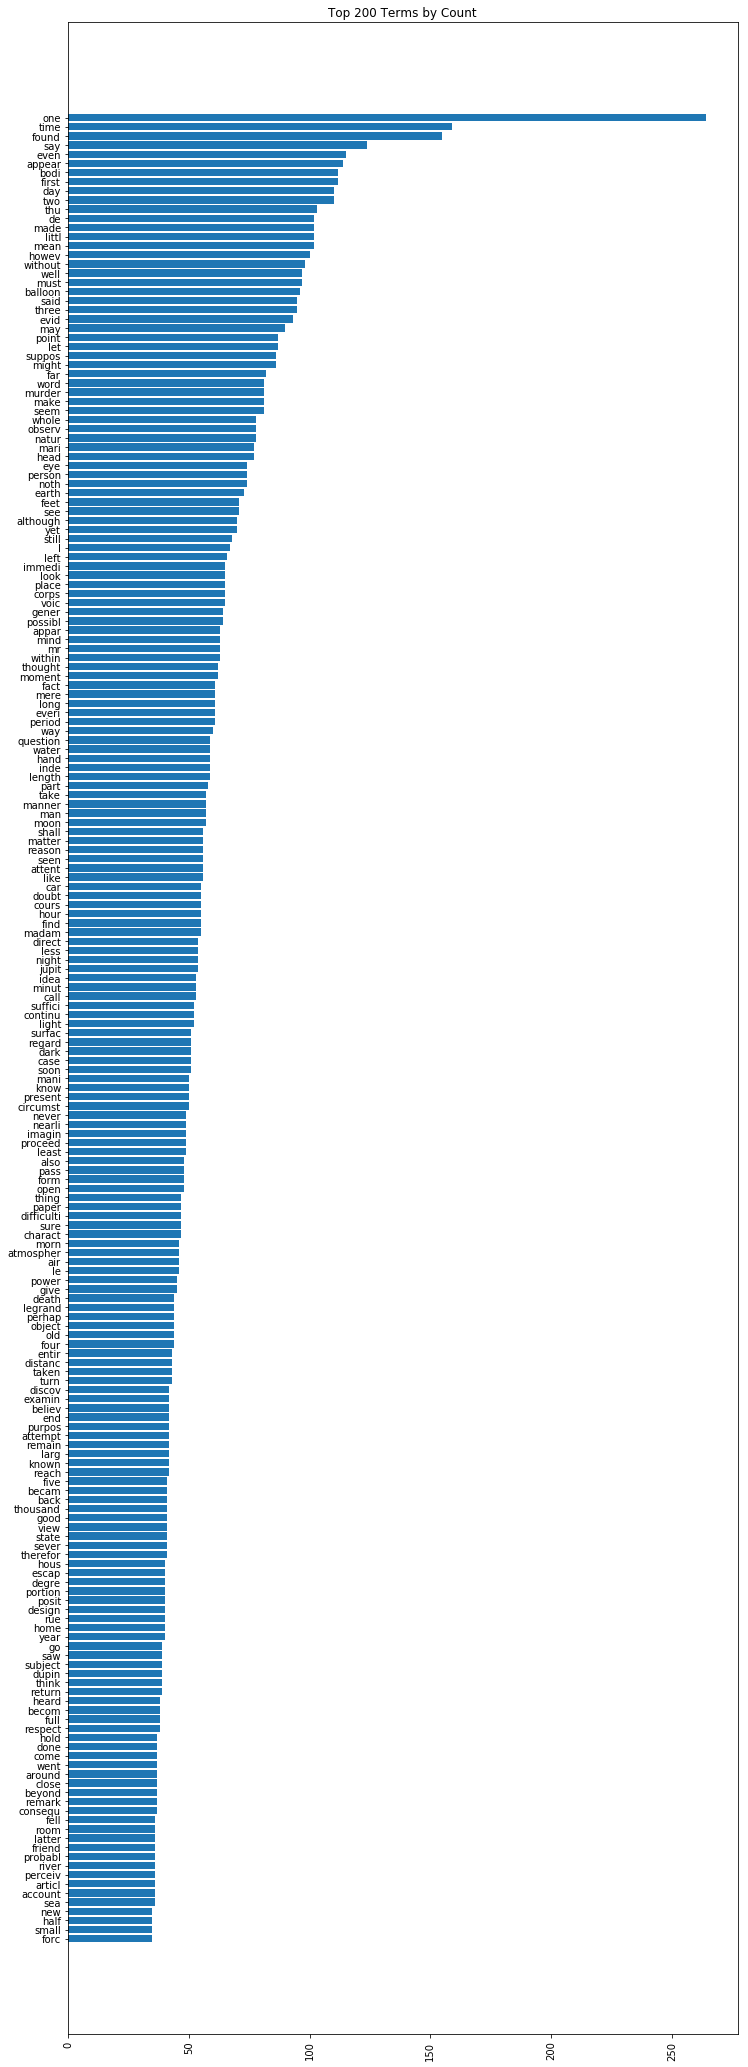

In [272]:
#plot the top 200 words with the highest frequencies 
plt.xticks(rotation=90)

plt.barh(range(len(most_words.Terms.tolist())),most_words.Count.tolist())
plt.yticks(range(len(most_words.Terms.tolist())),most_words.Terms.tolist())

plt.gca().invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(12, 37, forward=True)
plt.title("Top 200 Terms by Count")

plt.show()

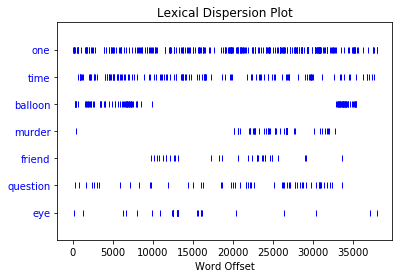

In [273]:
tokens = nltk.word_tokenize(raw)

words = [w.lower() for w in tokens]
words = [w.strip('_') for w in words]
words = [w.strip('*') for w in words]
nonPunct = re.compile('.*[A-Za-z].*')
words = [w for w in words if nonPunct.match(w)]
#remove stop words
words = [word for word in words if word not in stopword]

text = nltk.Text(words)

text.dispersion_plot(["one", "time", "balloon", "murder", "friend","question","eye"])

plt.show()

The previous plot shows the locations of 5 of the 200 most frequent words in the corpus.  The words 'one' and 'time' are distributed almost uniformly throughout the corpus.  The word 'balloon' to is present largely at the beginning and end of the corpus.  Poe is known for writing frightening stories so it is not surprising that the word 'murder' would appear frequently.  The word 'friend' appears throughout the corpus as well.

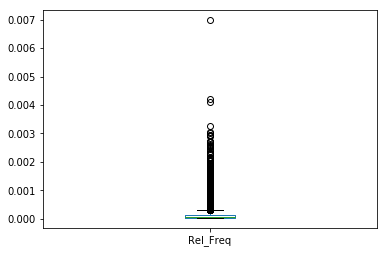

In [274]:
# ax = sn.boxplot(x="Terms", y="Count",data=book_data_tfdf, palette="Set3")
# plt.show()
book_data_tfdf.boxplot(column=['Rel_Freq'], 
                       grid=False)

50% of the words have a frequency less that 0.0005

In [275]:
Total_word = len(book_data_tfdf.Terms)
print('The total number of words is ' + str(total_count) + ' and the total number of unique words is ' + str(len(uniq_words)))

The total number of words is 37848 and the total number of unique words is 6532


In [276]:
half_total_word= Total_word/2
half_total_count= total_count/2
half_total_word, half_total_count

(3266.0, 18924.0)

In [277]:
#count back the most frequent words until reach 18,924, which is half of the total word count
book_data_tfdf['CountBack'] = book_data_tfdf['Count']

In [278]:
# .book_data_tfdf.iloc[0]['CountBack']
# book_data_tfdf.Count.values[0] +  + book_data_tfdf.Count.values[1]  

In [279]:
# Finding Count of all the words by adding pervious cell
for i in range(1, len(book_data_tfdf.Terms)):
    book_data_tfdf.CountBack.values[i] = book_data_tfdf.CountBack.values[i] + book_data_tfdf.CountBack.values[i-1]

#book_data_tfdf.head(50)

# book_data_tfdf[book_data_tfdf.Terms=='time'].Count

In [280]:
half_term = book_data_tfdf.Terms[book_data_tfdf.CountBack <=half_total_count]
print('{} word found in {} terms of the whole corpus'.format(half_total_count,len(half_term)+1))

book_data_tfdf[480:484]

18924.0 word found in 483 terms of the whole corpus


,Terms,Count,Rel_Freq,CountBack
2704,hesit,19,0.000502,18900
3716,mother,19,0.000502,18919
4025,other,19,0.000502,18938
4086,pain,19,0.000502,18957


##### 3. Taking the most common words, how many unique words represent half of the total words in the corpus? 
#####  483 unique words represent half of the total words in the corpus

      Terms  Count  Rel_Freq  CountBack      zipf
3987    one    264  0.006975        264  1.000000
5822   time    159  0.004201        423  0.602273
2306  found    155  0.004095        578  0.587121
4986    say    124  0.003276        702  0.469697
1954   even    115  0.003038        817  0.435606


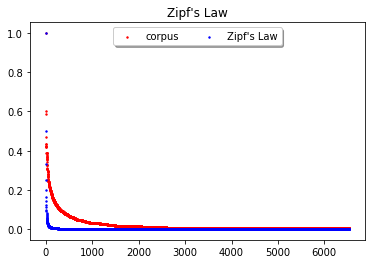

In [283]:
#Zipf's Law
book_data_tfdf['zipf']=book_data_tfdf['Count']/264
print(book_data_tfdf.head(5))
x_vals = list(range(1, len(book_data_tfdf)+1))
zipf = pd.DataFrame(x_vals)
zipf.columns = ['num']
zipf['zipf'] = 1/zipf['num']
book_data_tfdf['rank'] = x_vals



plt.scatter(x_vals, book_data_tfdf['zipf'], s=2, color='r', label="corpus")
plt.scatter(zipf['num'], zipf['zipf'], s=2, color='b', label="Zipf's Law")
plt.legend(loc='upper center', shadow=True, ncol=2)
plt.title ("Zipf's Law")
plt.show(block=True)

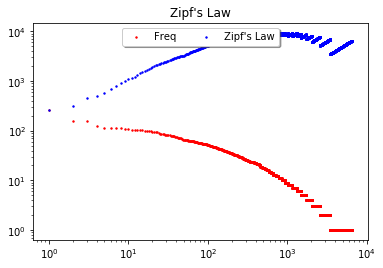

In [284]:

plt.scatter(book_data_tfdf['rank'], book_data_tfdf['Count'] ,s=2, color='r', label="Freq")
plt.xscale('log')
plt.yscale('log')
plt.scatter(book_data_tfdf['rank'], book_data_tfdf['Count']*book_data_tfdf['rank'], s=2, color='b', label="Zipf's Law")
plt.legend(loc='upper center', shadow=True, ncol=2)
plt.title ("Zipf's Law")
plt.show(block=True)

In [285]:

book_data_tfdf.head()


,Terms,Count,Rel_Freq,CountBack,zipf,rank
3987,one,264,0.006975,264,1.000000,1
5822,time,159,0.004201,423,0.602273,2
2306,found,155,0.004095,578,0.587121,3
4986,say,124,0.003276,702,0.469697,4
1954,even,115,0.003038,817,0.435606,5


##### 6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 
Zipf's law states that the frequency of the most common word will occur twice as often as the second most common word, three times as often as the third most common word, and so on.  The plot shown in blue is the inverse relationship: y = 1/x, which Zipf's law states.  The plot shown in red is the number of counts of each unique word in the corpus relative to the word that appears most frequently.  The plot in red follows the general trend of Zipf's law, but does not exactly equal that relationship.  The drop in the frequency values in the corpus is more gradual than Zipf's law states.

#### <i>7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”<i>

We noted lots of uncommon or very unfamiliar terms in the Term Frequency, as compared to all word in the real corpus. Few major steps that have impacted the frequency or words spelling are :

+ <u>Stopwords</u>: As part of our data cleaning process we dropped most of the known English stopwords and few numbers which we felt are more generic and don't give much info about the content. For example word 'The', 'for' etc. This would reduce the most frequent words to some very specifics sets of words which are not stopwords.

+ <u>Stemming</u>: Stemming is another text cleaning method opted during our data cleanup, which tries to reduce the word to its original stem part, whcih may work well with some but may not work with few othe terms like "meanness" and "meaning" they both have stem word as "mean". But its faster and if accuracy is not a major factor this can be a good starting point.
 
+ <u>Lemmatizing</u>: We also tried lemmatizing our terms, this the process is more dictionary originated and needs lots of process time depending on data. But the result is more accurate and it looks for words in corpus and word is not found then that word would be retained as it without stemming or losing its actual meaning.


These data cleaning technique reduces the words to some of the most generic forms which can be later used to build a model on.


In [286]:
print(book_data_tfdf.Terms[1:200].values)

['time' 'found' 'say' 'even' 'appear' 'bodi' 'first' 'day' 'two' 'thu'
 'de' 'made' 'littl' 'mean' 'howev' 'without' 'well' 'must' 'balloon'
 'said' 'three' 'evid' 'may' 'point' 'let' 'suppos' 'might' 'far' 'word'
 'murder' 'make' 'seem' 'whole' 'observ' 'natur' 'mari' 'head' 'eye'
 'person' 'noth' 'earth' 'feet' 'see' 'although' 'yet' 'still' 'l' 'left'
 'immedi' 'look' 'place' 'corps' 'voic' 'gener' 'possibl' 'appar' 'mind'
 'mr' 'within' 'thought' 'moment' 'fact' 'mere' 'long' 'everi' 'period'
 'way' 'question' 'water' 'hand' 'inde' 'length' 'part' 'take' 'manner'
 'man' 'moon' 'shall' 'matter' 'reason' 'seen' 'attent' 'like' 'car'
 'doubt' 'cours' 'hour' 'find' 'madam' 'direct' 'less' 'night' 'jupit'
 'idea' 'minut' 'call' 'suffici' 'continu' 'light' 'surfac' 'regard'
 'dark' 'case' 'soon' 'mani' 'know' 'present' 'circumst' 'never' 'nearli'
 'imagin' 'proceed' 'least' 'also' 'pass' 'form' 'open' 'thing' 'paper'
 'difficulti' 'sure' 'charact' 'morn' 'atmospher' 'air' 'le' 'power'
 '